# Introduction

This notebook presents an analysis of the famous iris dataset (details @ https://en.wikipedia.org/wiki/Iris_flower_data_set ). My aim with this analysis is not to do anything new - this dataset has been beaten into the ground by the data science community, so it'd be difficult to do anything truly innovative. Instead, my intention is to educate myself and other by providing an easy to follow end-to-end analysis.

# Loading the dataset

Luckily, sklearn provides an easy way to access the iris data. We could also get the data by downloading a csv and parsing it (probably using Pandas' read_csv function). The resulting dataset is what's called a 'bunch object' in python; this is essentially a dictionary where values are accessed using dot notation rather than brackets. Here we load the data and see what the keys to the bunch are.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

import numpy as np

Let's look at what each of these things is:

In [2]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


So it appears the bunch object comes with the following elements:
+ DESCR - A description of the dataset
+ data - A table of data points and features
+ target - A list of labels; this is what we will try and predict using the 'data' object
+ target_names - The actual names of the classes of the target list
+ feature_names - The names of the features we'll use to predict the targets. These map to the columns of the data object.

One other good practice is to check the dimensions of the 'data' and 'target' objects to make sure they match. The rows of the 'data' object should match the length of the 'target' object, and the columns of the 'data' object should match the 'feature_names' object.

In [6]:
n_rows, n_columns = iris.data.shape
n_labels = len(iris.target)
print(n_rows, n_columns)
print(n_labels)

150 4
150


# Examining the data
Once we've confirmed that the data has been loaded properly and is of the right dimensions, the next step is to start examining the data for relationships. I like to do this in two ways: statistical summaries and charts. For summarizing tables of data, Pandas has some nice built-in functions.

In [7]:
import pandas as pd
index = range(n_rows)
columns = iris.feature_names
iris_dataframe = pd.DataFrame(data = iris.data, index = index, columns = columns)
print (iris_dataframe.describe())
print (iris_dataframe.head())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9        

You can see above the 'describe' function prints a nice table summarizing each of the features in the dataset, while the 'head' function prints out just the first few rows of the dataset. Note that we have no missing values, since the 'count' of each of our features is exactly 150.

Now let's take a deeper look at the data by plotting it. The input features are 4-dimensional, but we can take each pair of features and plot them in 2 dimensional space. By coloring the points according to their labels, we can see if any combinations of features are particularly useful for separating the data.

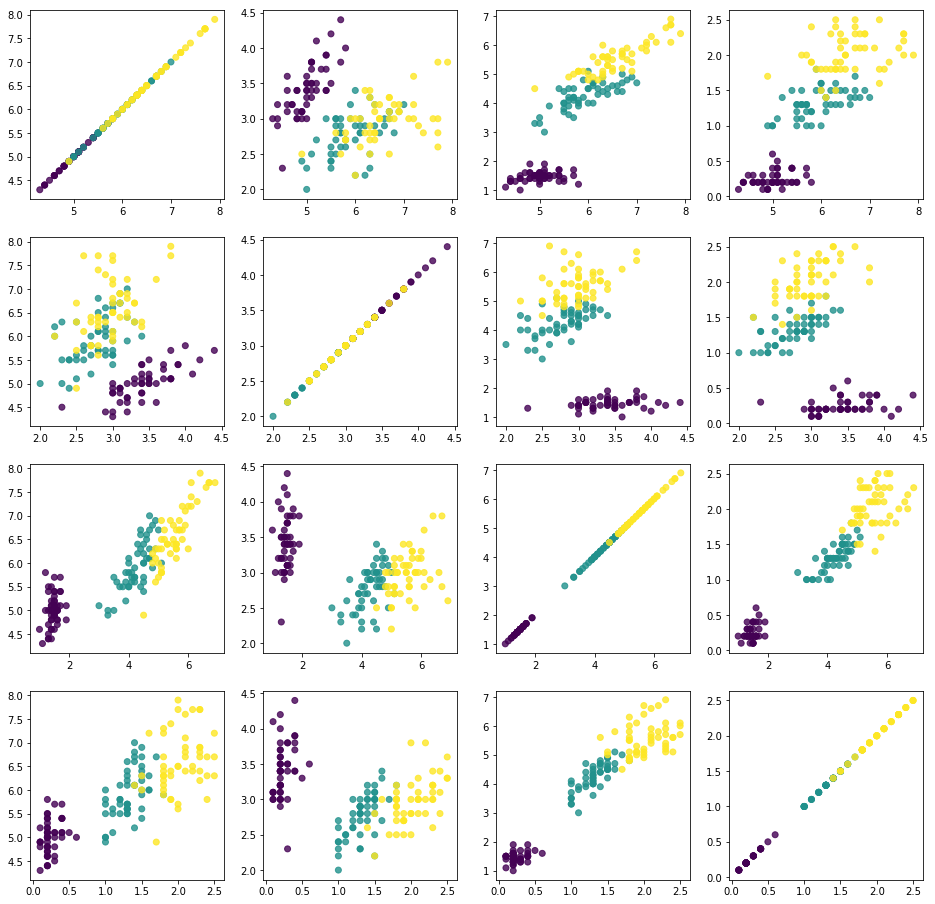

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

f, a = plt.subplots(4,4, figsize = (16,16))
for i in range(4):
    for j in range(4):
        x = iris.data[:,i]
        y = iris.data[:,j]
        a[i,j].scatter(x,y,c=iris.target, alpha=0.8)
        handles, labels = a[i,j].get_legend_handles_labels()

You can see from the plots that the iris species do appear to be very separable based on the input features. Something like a naive bayes classifier or support vector machine will probably do very well on this data. That being said, let's see if we can do better. Let's look at the coordinates of each iris in the space spanned by the first 2 principle components.

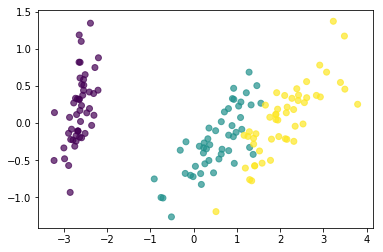

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
iris_mean = np.mean(iris.data,axis=0)
iris_normalized = iris.data-iris_mean
iris_pca = pca.fit_transform(iris_normalized)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target,alpha=0.7)

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,
    out_file='tree.dot')        

In [11]:
!pip install pydotplus

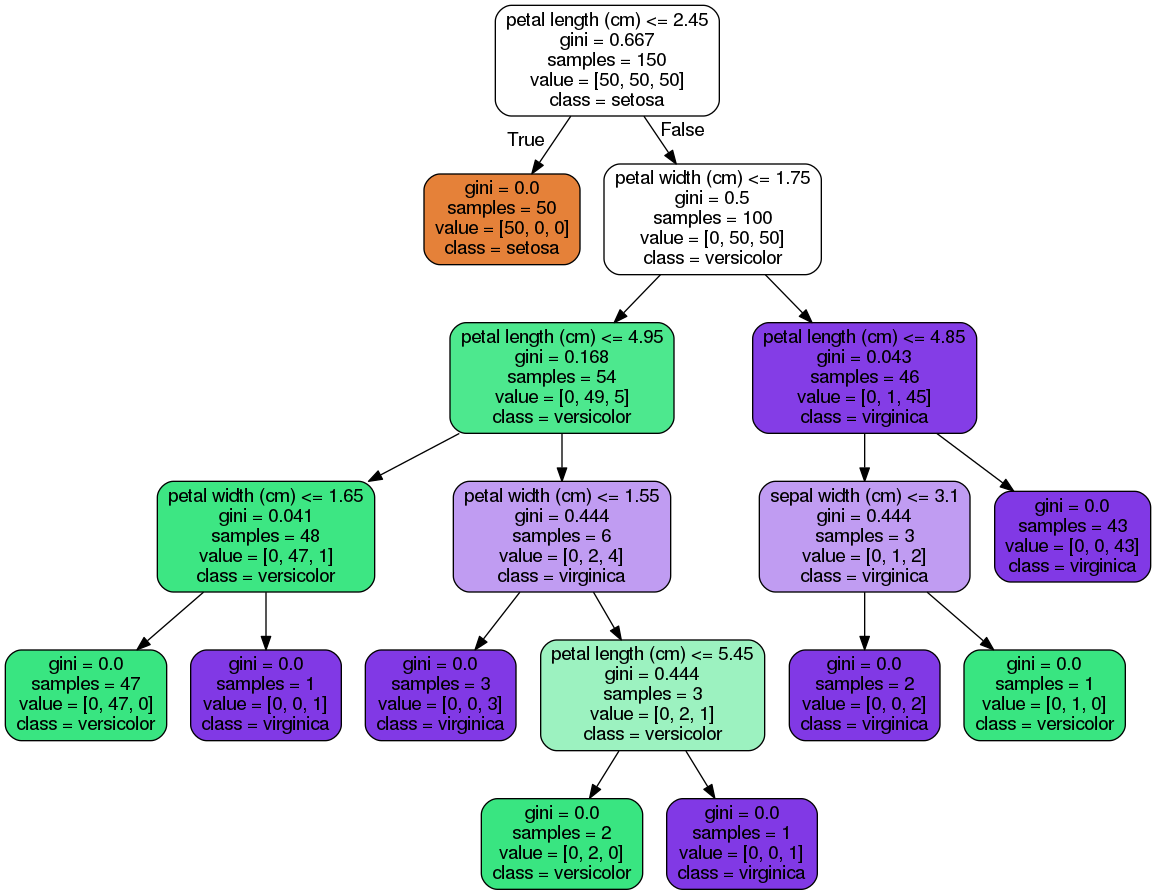

In [12]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

You can see above that the principal components don't do a significantly better job than the original features at separating the data. Now that we've examined our data, it's time to build a classifier. Since our training set is small, we'll go with a support vector machine. Since SVMs can be very sensitive to the input parameters, we'll do a grid search over a set of parameters to find the best combination. We'll split the data into a training set and a test set, perform the parameter search and fitting on the trainining set, and then test our classifier on the test set to see how well we did.

In [13]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size = 0.5)
print ("Training data shape: %r, Training labels shape: %r" % (features_train.shape, labels_train.shape))
print ("Test data shape: %r, Test labels shape: %r" % (features_test.shape, labels_test.shape))

Training data shape: (75, 4), Training labels shape: (75,)
Test data shape: (75, 4), Test labels shape: (75,)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First let's train a basic SVM on the training set, just to see how it does:

In [14]:
svm = SVC()
svm.fit(features_train, labels_train)
print ("Classifier score on training data: %r" % svm.score(features_train, labels_train))
print ("Classifier score on test data: %r" %svm.score(features_test, labels_test))

Classifier score on training data: 0.96
Classifier score on test data: 1.0


So our classifier is already doing quite well with ~95% accuracy on both the training and test data. The fact that it's less than 100% accurate on the training data suggests it's underfitting, however. Let's see if we can do better by varying some parameters.

In [15]:
from sklearn.grid_search import GridSearchCV

c_values = np.logspace(-2,3,base=10,num=6)
kernel_values = ['poly','rbf','sigmoid'] # linear not included because it will perpetuate the underfitting
gamma_values = np.logspace(-2,3,base=10,num=6)
params = {'C': c_values, 'kernel': kernel_values, 'gamma': gamma_values}

svm = SVC()
clf = GridSearchCV(svm,params)
clf.fit(features_train, labels_train)

print ("Classifier score on training data: %r" % clf.score(features_train, labels_train))
print ("Classifier score on test data: %r" % clf.score(features_test, labels_test))
print ("SVM best parameters found by grid search: %r" % clf.best_params_)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Classifier score on training data: 0.9733333333333334
Classifier score on test data: 0.96
SVM best parameters found by grid search: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


Now we're at about 99% accuracy on the training data and 96% on the test data. However, this is based on only one training subset; we could just be getting lucky with our random train/test split. A common technique to detect this is called cross validation. In cross validation, we break the dataset up into multiple random training/testing sets, and look at the model's performance across each to determine how well it will generalize to new data. Luckily, sklearn includes a cross-validation module which includes many different methods of doing this (http://scikit-learn.org/stable/modules/cross_validation.html). We'll use the simplest method of cross-validation (k-folds) to get a better picture of how this model performs.

In [16]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, iris.data, iris.target, cv = 10)
print ("Accuracy: %r (+/- %r)" % (scores.mean(), scores.std()))

Accuracy: 0.9733333333333334 (+/- 0.03265986323710904)


So our classifier works quite well across 10 folds of the original dataset.

# Conclusion
In this notebook we took a well-known data set, explored its characteristics, and fitted a classifier to it. The classifier ended up having an accuracy score of ~97%. If you can make a classifier that does better, I'd love to hear it.